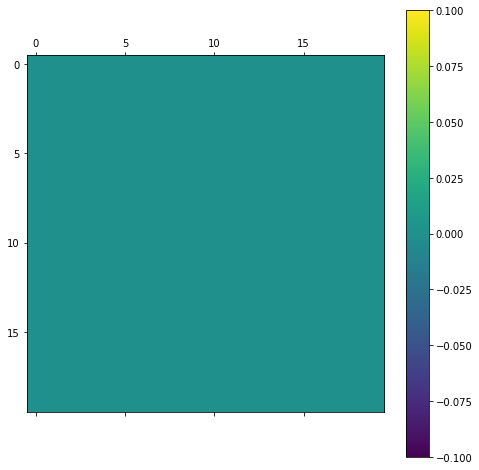

In [9]:
import sys
sys.path.append('.')

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import TabularTD0
from myelin.core import MDPEnvironment
from myelin.core.interactions import EnvironmentInteraction
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy

def show_value_function(vf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.matshow(vf)
    plt.colorbar()
    plt.show()

ROWS = 20
COLS = 20

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
vf = np.zeros((ROWS, COLS))
td0 = TabularTD0(env.action_space, policy, vf)

show_value_function(vf)

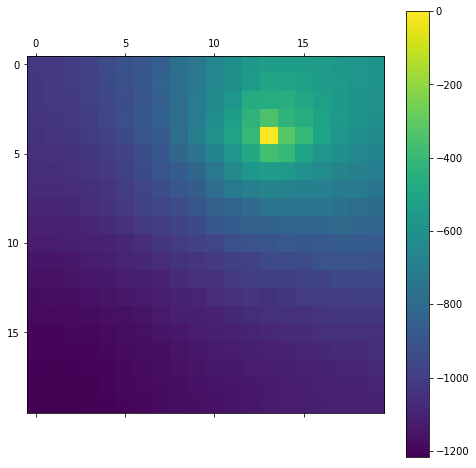

In [10]:
interaction = EnvironmentInteraction(env, td0)
interaction.train(10000)

show_value_function(vf)